In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               344 non-null    object 
 1   Stage                344 non-null    object 
 2   Individual ID        344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    331 non-null    float64
 9   Comments             26 non-null     object 
dtypes: float64(6), object(4)
memory usage: 27.0+ KB


In [2]:
# Drop non-numeric and non-categorical columns
df.drop(['Individual ID','Comments','Region','Stage'], axis=1, inplace=True)
# Use SimpleImputer to Fill in missing values by the average of the whole column
impN = SimpleImputer(missing_values=np.nan, strategy='mean')
idf = pd.DataFrame(impN.fit_transform(df))
# Stanardize the Data to ensure data is on the same scale
ss = StandardScaler()
idf = pd.DataFrame(ss.fit_transform(idf))
idf.columns = df.columns
idf.index = df.index

Text(0.5, 1.0, 'Eps Distance on 11 nearest neighbors')

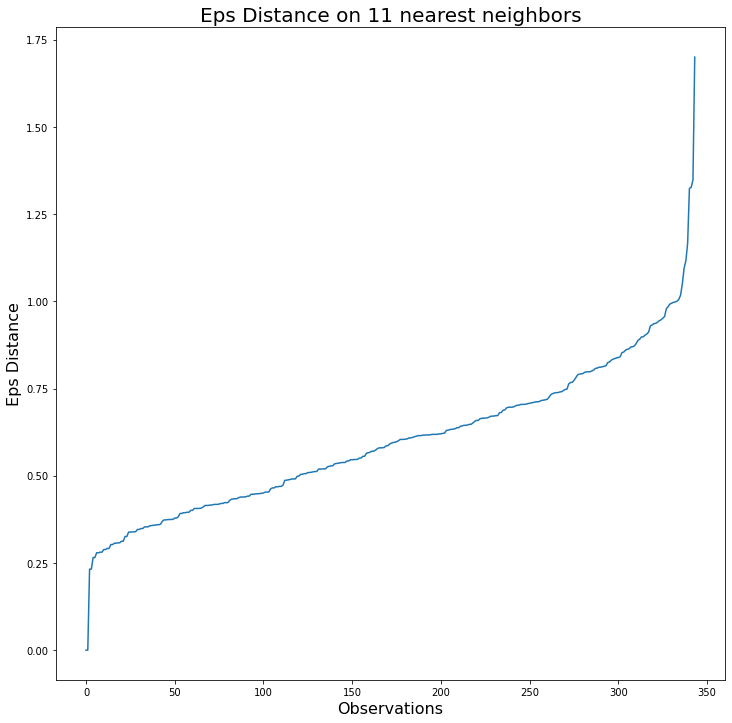

In [3]:
# Optimize epsilon by k nearest neighbors, k is determined by min_sample - 1
k = idf.shape[1] * 2 -1
nbrs = NearestNeighbors(n_neighbors=k).fit(idf)
distances, indices = nbrs.kneighbors(idf)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(12,12))
plt.plot(distances)
plt.xlabel('Observations', fontsize=16)
plt.ylabel('Eps Distance',fontsize = 16)
plt.title(f'Eps Distance on {k} nearest neighbors', fontsize=20)

After looking at the nearest neighbor graph, an eps of 1 seems optimal for the model.

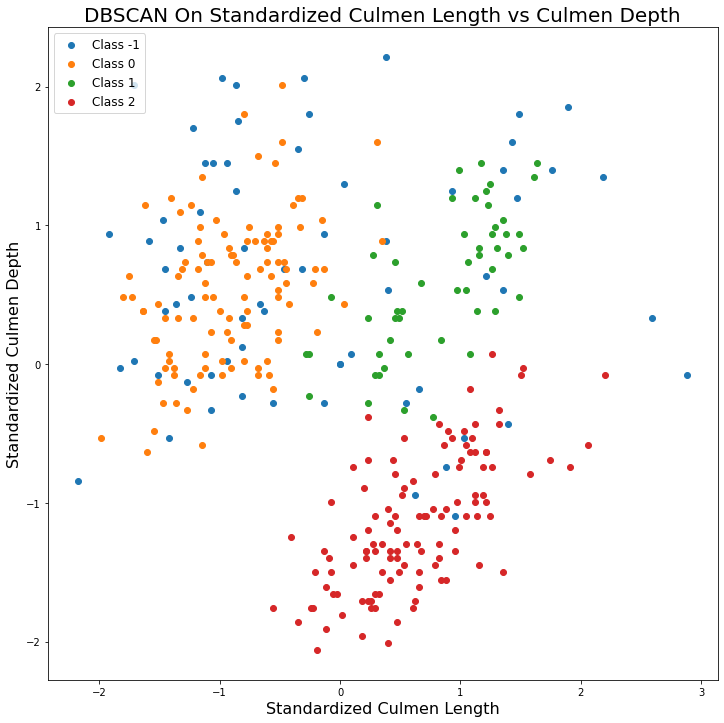

In [4]:
# Min_sample parameter is determined by a rule of thumb where min_samples = 2 * Dimension (6 in this dataset)
cluster = DBSCAN(eps=1,min_samples=k+1).fit(idf)
labels = cluster.labels_
uniLabel = np.unique(labels)
labelList = []
for i in uniLabel:
    labelList.append(f'Class {uniLabel[i]}')
labelList.sort()
plt.figure(figsize=(12,12))
for i in uniLabel:
        filteredLabel = idf[labels == i]
        plt.scatter(filteredLabel['Culmen Length (mm)'],filteredLabel['Culmen Depth (mm)'])
plt.legend(labelList, loc = 2, fontsize=12)
plt.title(f'DBSCAN On Standardized Culmen Length vs Culmen Depth', fontsize=20)
plt.xlabel('Standardized Culmen Length', fontsize=16)
plt.ylabel('Standardized Culmen Depth', fontsize=16)
plt.show()

Plot Additional Charts for Performance Analysis

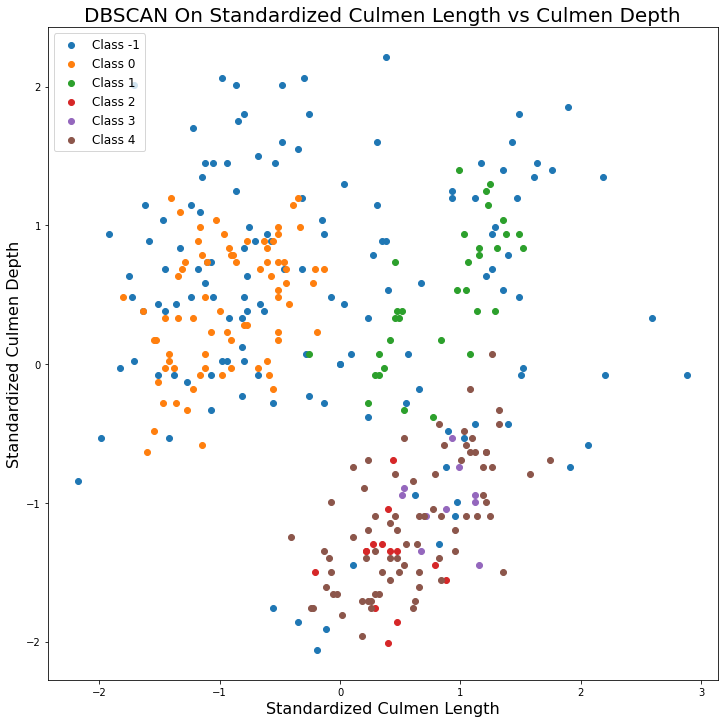

In [5]:
cluster = DBSCAN(eps=0.9,min_samples=k+1).fit(idf)
labels = cluster.labels_
uniLabel = np.unique(labels)
labelList = []
for i in uniLabel:
    labelList.append(f'Class {uniLabel[i]}')
labelList.sort()
plt.figure(figsize=(12,12))
for i in uniLabel:
        filteredLabel = idf[labels == i]
        plt.scatter(filteredLabel['Culmen Length (mm)'],filteredLabel['Culmen Depth (mm)'])
plt.legend(labelList, loc = 2, fontsize=12)
plt.title(f'DBSCAN On Standardized Culmen Length vs Culmen Depth', fontsize=20)
plt.xlabel('Standardized Culmen Length', fontsize=16)
plt.ylabel('Standardized Culmen Depth', fontsize=16)
plt.show()

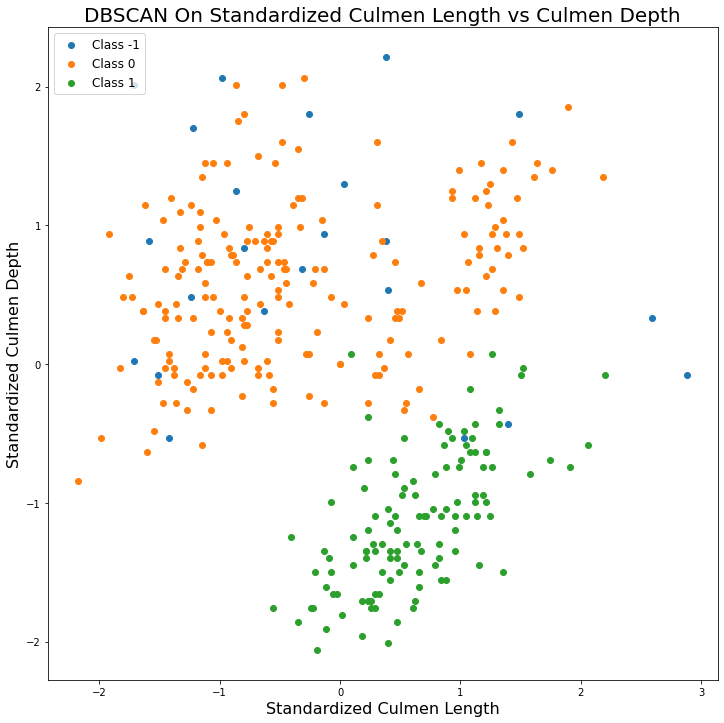

In [6]:
cluster = DBSCAN(eps=1.1,min_samples=k+1).fit(idf)
labels = cluster.labels_
uniLabel = np.unique(labels)
labelList = []
for i in uniLabel:
    labelList.append(f'Class {uniLabel[i]}')
labelList.sort()
plt.figure(figsize=(12,12))
for i in uniLabel:
        filteredLabel = idf[labels == i]
        plt.scatter(filteredLabel['Culmen Length (mm)'],filteredLabel['Culmen Depth (mm)'])
plt.legend(labelList, loc = 2, fontsize=12)
plt.title(f'DBSCAN On Standardized Culmen Length vs Culmen Depth', fontsize=20)
plt.xlabel('Standardized Culmen Length', fontsize=16)
plt.ylabel('Standardized Culmen Depth', fontsize=16)
plt.show()

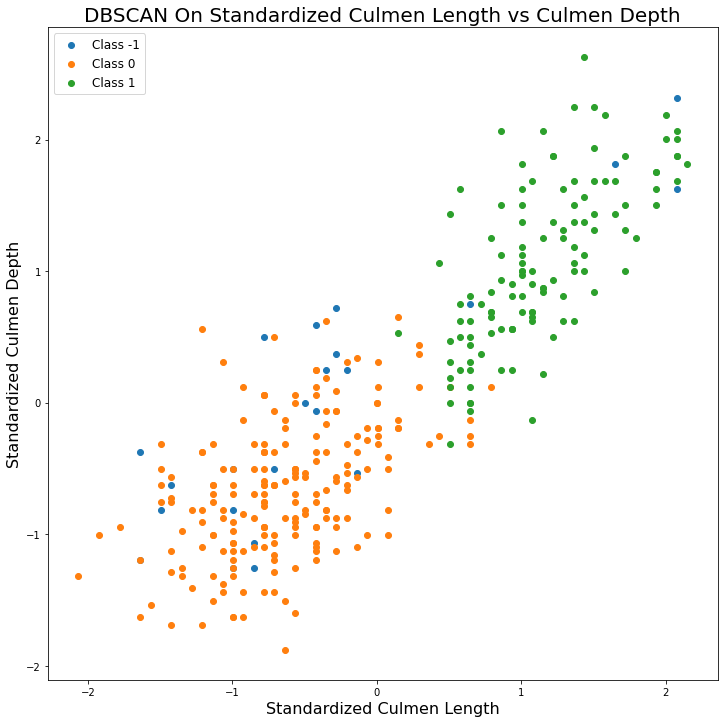

In [7]:
cluster = DBSCAN(eps=1.1,min_samples=k+1).fit(idf)
labels = cluster.labels_
uniLabel = np.unique(labels)
labelList = []
for i in uniLabel:
    labelList.append(f'Class {uniLabel[i]}')
labelList.sort()
plt.figure(figsize=(12,12))
for i in uniLabel:
        filteredLabel = idf[labels == i]
        plt.scatter(filteredLabel['Flipper Length (mm)'],filteredLabel['Body Mass (g)'])
plt.legend(labelList, loc = 2, fontsize=12)
plt.title(f'DBSCAN On Standardized Culmen Length vs Culmen Depth', fontsize=20)
plt.xlabel('Standardized Culmen Length', fontsize=16)
plt.ylabel('Standardized Culmen Depth', fontsize=16)
plt.show()

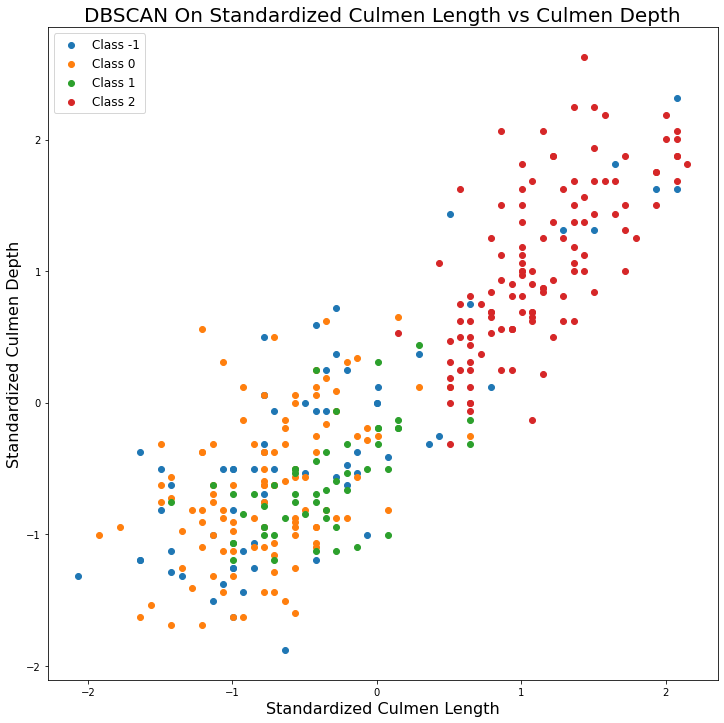

In [8]:
cluster = DBSCAN(eps=1,min_samples=k+1).fit(idf)
labels = cluster.labels_
uniLabel = np.unique(labels)
labelList = []
for i in uniLabel:
    labelList.append(f'Class {uniLabel[i]}')
labelList.sort()
plt.figure(figsize=(12,12))
for i in uniLabel:
        filteredLabel = idf[labels == i]
        plt.scatter(filteredLabel['Flipper Length (mm)'],filteredLabel['Body Mass (g)'])
plt.legend(labelList, loc = 2, fontsize=12)
plt.title(f'DBSCAN On Standardized Culmen Length vs Culmen Depth', fontsize=20)
plt.xlabel('Standardized Culmen Length', fontsize=16)
plt.ylabel('Standardized Culmen Depth', fontsize=16)
plt.show()

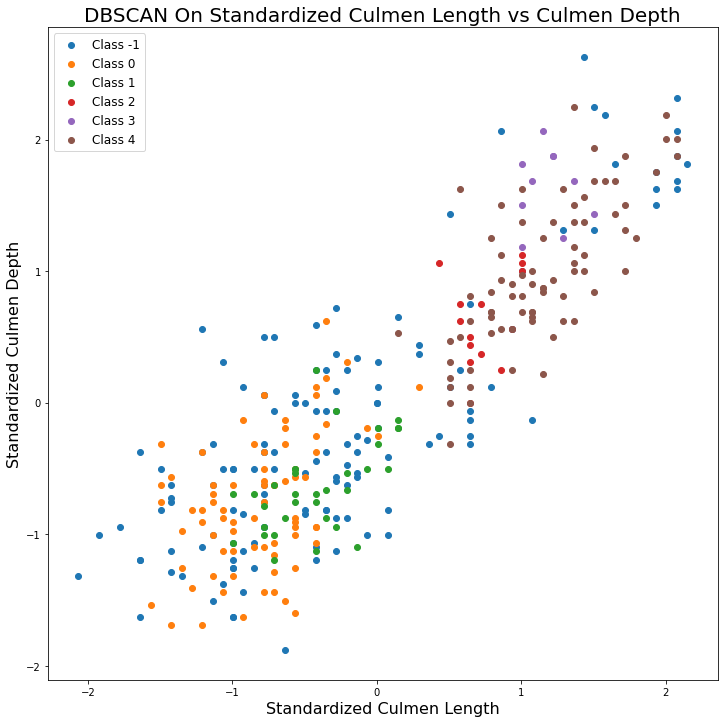

In [9]:
cluster = DBSCAN(eps=0.9,min_samples=k+1).fit(idf)
labels = cluster.labels_
uniLabel = np.unique(labels)
labelList = []
for i in uniLabel:
    labelList.append(f'Class {uniLabel[i]}')
labelList.sort()
plt.figure(figsize=(12,12))
for i in uniLabel:
        filteredLabel = idf[labels == i]
        plt.scatter(filteredLabel['Flipper Length (mm)'],filteredLabel['Body Mass (g)'])
plt.legend(labelList, loc = 2, fontsize=12)
plt.title(f'DBSCAN On Standardized Culmen Length vs Culmen Depth', fontsize=20)
plt.xlabel('Standardized Culmen Length', fontsize=16)
plt.ylabel('Standardized Culmen Depth', fontsize=16)
plt.show()